Conditional independence reduces the numbers of independent parameters needed to define the model.

#### Exercise 2.1:

$p(x|\lambda) = \lambda e^{-\lambda x}$

Using equation (2.9):

$cdf_X(x) = P(X \leq x) = \int_{-\infty}^{x}{p(x')dx'}$
$= \int_{-\infty}^{x}{\lambda e^{-\lambda x'}dx'}$
$= -\frac{\lambda e^{-\lambda x'}}{\lambda}|^x _{-\infty} = 1- e^{-\lambda x'}$

#### Exercise 2.2:

5 components, with uniform distributions:

- $U([-10, -5],[-10, 10])$
- $U([-5, 0],[0, 10])$
- $U([0, 10],[5, 10])$
- $U([-5, 10],[-10, 0])$
- $U([0, 10],[0, 5])$

Verify the density function integrates to 1:
- $5 \times 20 \times .003 = 0.3$
- $5 \times 10 \times .003 = 0.15$
- $10 \times 5 \times .000 = 0.0$
- $15 \times 10 \times .000275 = 0.4125$
- $10 \times 5 \times .000275 = 0.1375$

#### Exercise 2.3:

#### Exercise 2.4:

Three components over four variables, two of the three Guassian distributions assume independence between 4 variables, the other distribution is defined without any independence assumptions. How many independent parameters are required to specify this mixture model?

Page 29.

$N_k(x_k|\mu_k,\Sigma_k)$ where $k=4$ and $x \in \Re^4$

For Guassian distributions (general), need $n$ params for $\mu$ and $(n+1)n/2$ for $\Sigma$ (which is symmetric).

For Guassian distributions with independent distributions, need $n$ params for $\mu$ and $n$ for $\Sigma$ (which is diagonal).

For mixture models, there are k-1 independent params (they sum to 1).

#### Exercise 2.5:

#### Exercise 2.6:

Four continuous RVs: $X_1, X_2, Y_1, Y_2$

Linear Gaussian: $p(X|Y) = N(\boldsymbol{x}|\boldsymbol{My}+\boldsymbol{b},\boldsymbol{\Sigma})$

$\begin{vmatrix}
m_1 & m_2\\
m_3 & m_4
\end{vmatrix}
\begin{vmatrix}
Y_1\\
Y_2
\end{vmatrix}
+
\begin{vmatrix}
b_1\\
b_2
\end{vmatrix},
\begin{vmatrix}
\sigma_1^2 & \sigma_1\sigma_2\\
\sigma_2\sigma_1 & \sigma_2^2
\end{vmatrix}
$

$\boldsymbol{\theta} = [m_{1:4},b_{1:2},\Sigma_{1:3}]$, which is 9 parameters.

#### Exercise 2.7:

Full joint: $4^6 - 1 = 4095$

Bayes Net: $P(A)P(D)P(B|A)P(E|D)P(C|B,D)P(F|C,E)$

- $P(A)$ -> 3 independent parameters
- $P(B|A)$ -> 3x4 independent params
- $P(C|B,D)$ -> 3x4x4 = 48 independent params

$6+24+96 = 126$. $(4095- 126)/4095 = 0.969$

#### Exercise 2.8:

Is $A$ d-separated from E, given C?

Two paths: $A \rightarrow D \rightarrow E$ and $A \rightarrow C \rightarrow E$

Need both paths to be d-separated:
1. The path contains a chain with C in Y. First one no, second one yes.
2. The path contains a fork with C in Y. No for both.
3. The path contains an inverted fork, without C in Y. No for both.


#### Exercise 2.9:

_Markov blanket_ refers to the minimal set of nodes that, if their values are known, make $X$ conditionally independent of all other nodes: its parents, children, and the other parents of its children.

For node $B$:
- Parents: $A$
- Children: $D, E$
- The other parents of its children: $C$.

Full method (reference the 3 ways to achieve d-separation enumerated in previous solution):
- $A \rightarrow B$. 1. chain $A$
- $D \rightarrow B$. 1. chain $D$
- $B \rightarrow E$. 1. chain $E$
- $B \rightarrow E \rightarrow C$. Contains a fork with $E$, so need $C$ to create a chain. 1.
- $B \rightarrow E \rightarrow G (\rightarrow F, H)$. Since $E$ is already in, $F, G, H$ are already d-separated from $B$.

### using Julia

In [14]:
# Run these the first time:
# import Pkg
# Pkg.add("Graphs")
# Pkg.add("Distributions")
# Pkg.update()

In [15]:
include("g.jl")

In [16]:
include("ch2.jl")

probability (generic function with 1 method)

In [17]:
a = Dict{Symbol, Integer}((a=1, b=2, c=3))

Dict{Symbol,Integer} with 3 entries:
  :a => 1
  :b => 2
  :c => 3

In [18]:
B = (d=-1, e=-2, f=-3)

(d = -1, e = -2, f = -3)

In [19]:
b = Dict{Symbol, Integer}(B)

Dict{Symbol,Integer} with 3 entries:
  :f => -3
  :d => -1
  :e => -2

In [20]:
isequal(a, (a=1, c=3, b=2))

true

In [21]:
isequal(a, (a=1, b=2))

false

#### Example 2.3

In [22]:
X = Variable(:x, 2)
Y = Variable(:y, 2)
Z = Variable(:z, 2)
ϕ = Factor([X, Y, Z], FactorTable(
        (x=1, y=1, z=1) => 0.08, (x=1, y=1, z=2) => 0.31,
        (x=1, y=2, z=1) => 0.09, (x=1, y=2, z=2) => 0.37,
        (x=2, y=1, z=1) => 0.01, (x=2, y=1, z=2) => 0.05,
        (x=2, y=2, z=1) => 0.02, (x=2, y=2, z=2) => 0.07,
    ))

Factor(Variable[Variable(:x, 2), Variable(:y, 2), Variable(:z, 2)], Dict(Dict(:y => 1,:z => 2,:x => 2) => 0.05,Dict(:y => 2,:z => 2,:x => 2) => 0.07,Dict(:y => 1,:z => 1,:x => 1) => 0.08,Dict(:y => 2,:z => 1,:x => 1) => 0.09,Dict(:y => 1,:z => 2,:x => 1) => 0.31,Dict(:y => 1,:z => 1,:x => 2) => 0.01,Dict(:y => 2,:z => 2,:x => 1) => 0.37,Dict(:y => 2,:z => 1,:x => 2) => 0.02))

#### Example 2.5

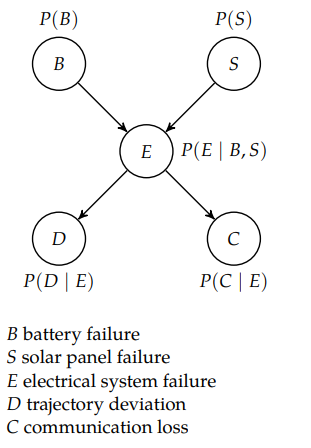

In [23]:
B = Variable(:b, 2); S = Variable(:s, 2)
E = Variable(:e, 2)
D = Variable(:d, 2); C = Variable(:c, 2)
vars = [B, S, E, D, C]
factors = [
    Factor([B], FactorTable((b=1,) => 0.99, (b=2,) => 0.01)),
    Factor([S], FactorTable((s=1,) => 0.98, (s=2,) => 0.02)),
    Factor([E, B, S], FactorTable(
            (e=1,b=1,s=1) => 0.90, (e=1,b=1,s=2) => 0.04,
            (e=1,b=2,s=1) => 0.05, (e=1,b=2,s=2) => 0.01,
            (e=2,b=1,s=1) => 0.10, (e=2,b=1,s=2) => 0.96,
            (e=2,b=2,s=1) => 0.95, (e=2,b=2,s=2) => 0.99)),
    Factor([D, E], FactorTable(
            (d=1,e=1) => 0.96, (d=1,e=2) => 0.03,
            (d=2,e=1) => 0.04, (d=2,e=2) => 0.97)),
    Factor([C, E], FactorTable(
            (c=1,e=1) => 0.98, (c=1,e=2) => 0.01,
            (c=2,e=1) => 0.02, (c=2,e=2) => 0.99))
]

graph = SimpleDiGraph(5)
add_edge!(graph, 1, 3); add_edge!(graph, 2, 3)
add_edge!(graph, 3, 4); add_edge!(graph, 3, 5)
bn = BayesianNetwork(vars, factors, graph);

In [24]:
a = Assignment((b=1, s=1, e=1, d=1, c=1))

Dict{Symbol,Int64} with 5 entries:
  :b => 1
  :d => 1
  :s => 1
  :e => 1
  :c => 1

In [25]:
probability(bn, a)

0.8214877439999999

In [26]:
b = a = Assignment((b=1, s=1, e=1, d=2, c=1))
probability(bn, b)

0.034228655999999996